In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import precision_recall_curve,roc_auc_score, confusion_matrix,classification_report,roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

Here is the information on this particular data set:

0. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
1. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
2. int_rate : Interest Rate on the loan
3. installment : The monthly payment owed by the borrower if the loan originates.
4. grade 	LC : assigned loan grade
5. sub_grade 	LC : assigned loan subgrade
6. emp_title : The job title supplied by the Borrower when applying for the loan.
7. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
9. annual_inc : The self-reported annual income provided by the borrower during registration.
10. verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified
11. issue_d : The month which the loan was funded
12. loan_status : Current status of the loan
13. purpose : A category provided by the borrower for the loan request.
14. title : The loan title provided by the borrower
15. zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.
16. addr_state : The state provided by the borrower in the loan application
17. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
18. earliest_cr_line : The month the borrower's earliest reported credit line was opened
19. open_acc : The number of open credit lines in the borrower's credit file.
20. pub_rec : Number of derogatory public records
21. revol_bal : Total credit revolving balance
22. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
23. total_acc : The total number of credit lines currently in the borrower's credit file
24. initial_list_status : The initial listing status of the loan. Possible values are – W, F
25. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
26. mort_acc :	Number of mortgage accounts.
27. pub_rec_bankruptcies :	Number of public record bankruptcies

In [451]:
df =  pd.read_csv("LoanTap Logistic Regression.csv")
df_2 = df.copy(deep=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [453]:
# Shape of the dataset -
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  396030
No. of columns:  27


In [454]:
# Checking the distribution of outcome labels -
df.loan_status.value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

In [455]:
# Statistical summary of the dataset -
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,396030,396030,396030,396030,394274,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,3,115,2,14,48816,NaN,684,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,NaN,Oct-2000,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,139563,14846,318357,234507,152472,NaN,3017,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,NaN,NaN,NaN,NaN,NaN,17.379514,NaN,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,NaN,NaN,NaN,NaN,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,11.280000,NaN,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,NaN,NaN,16.910000,NaN,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,NaN,22.980000,NaN,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


### Data Exploration 

In [456]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Grade and Subgrade affecting 

C:\Users\ahuja\AppData\Local\Temp\ipykernel_16204\3989173426.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90);


Text(0.5, 1.0, 'Loan Status by Sub Grade')

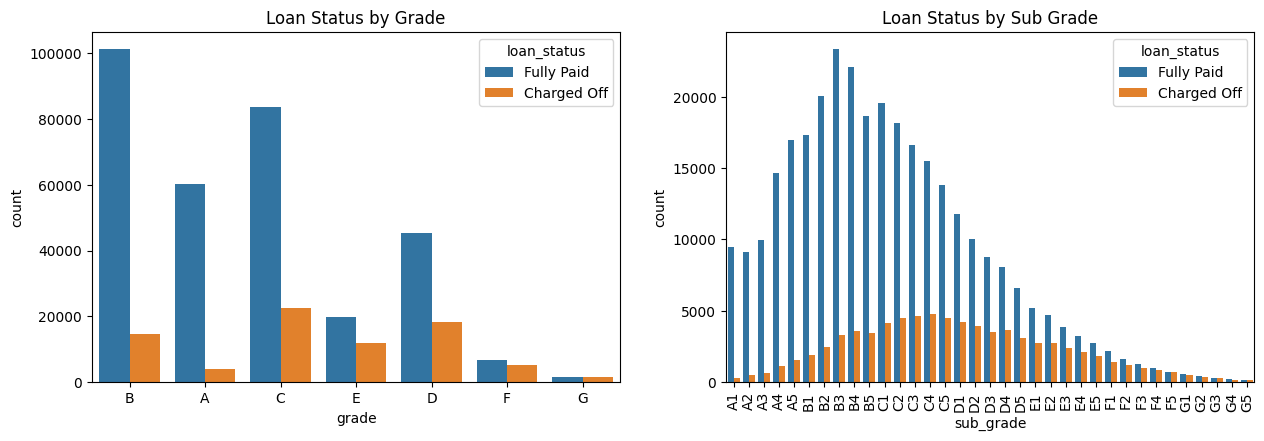

In [457]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x='grade',data=df,hue='loan_status')
plt.title('Loan Status by Grade')

plt.subplot(2,2,2)
g = sns.countplot(x='sub_grade',data=df,hue='loan_status', order = sorted(df['sub_grade'].unique()))
g.set_xticklabels(g.get_xticklabels(),rotation=90);
plt.title('Loan Status by Sub Grade')

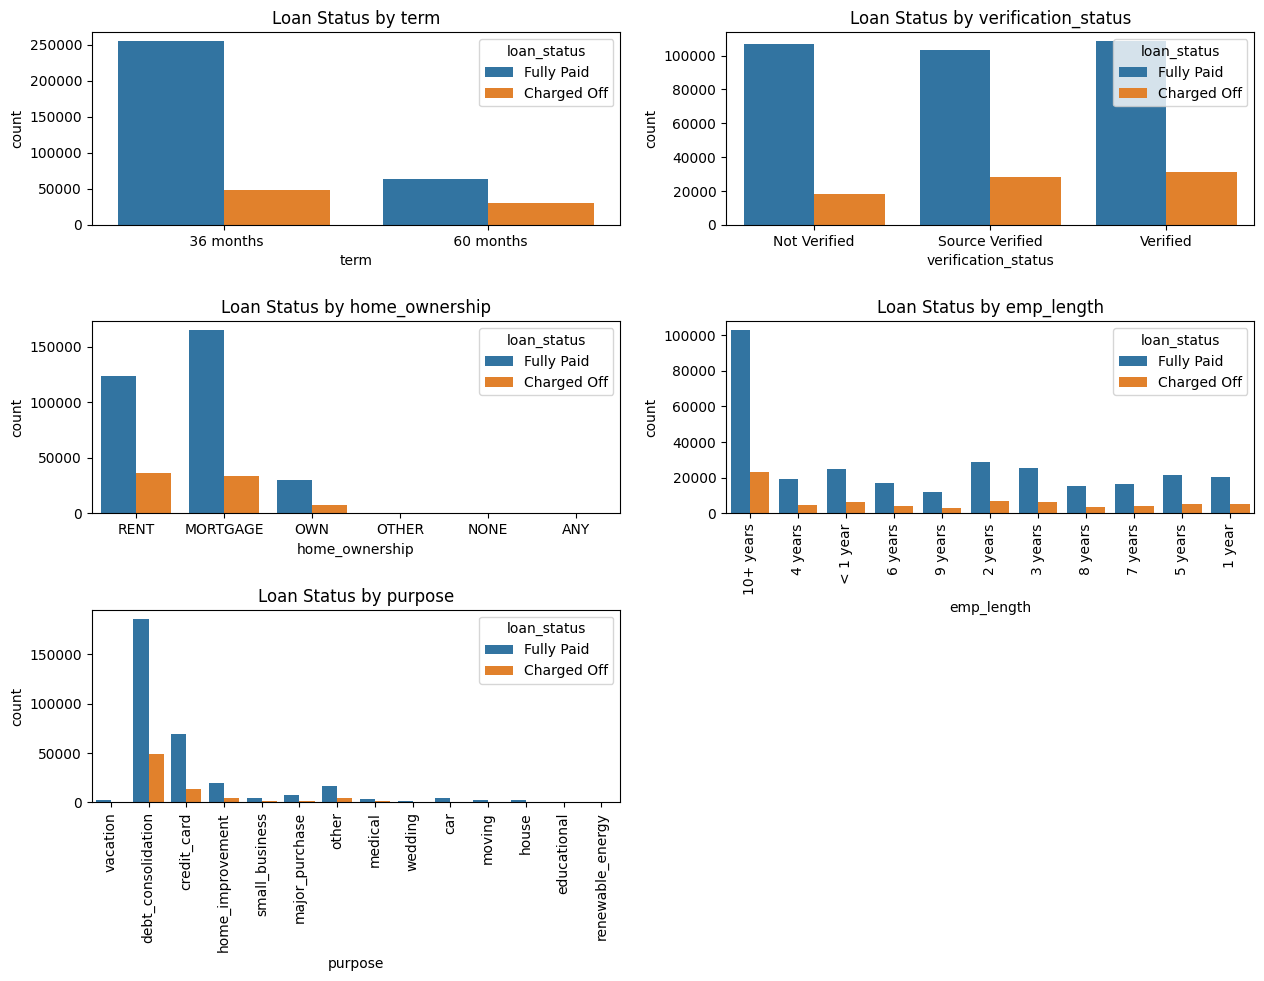

In [458]:
plt.figure(figsize=(15,10))
columns = ['term','verification_status','home_ownership','emp_length','purpose']
for i in range(1,len(columns)+1):
    if i == 2:
        plt.subplots_adjust(hspace= 0.5) 
    plt.subplot(3,2,i)
    g = sns.countplot(x=columns[i-1],data=df,hue='loan_status')
    if i == 4 or i==5:
        plt.xticks(rotation=90)
    plt.title('Loan Status by '+ columns[i-1])

##### Insights
- All the application type is Individual
- Most of the loan tenure is disbursed for 36 months
- The grade of majority of people those who have took the loan is 'B' and have subgrade 'B3'.
- So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

#### Loan Satus, Home_ownership, Term

In [459]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


1. The no of people those who have fully paid are 318357 and that of Charged Off are 77673.
2. The majority of people have home ownership as Mortgage and Rent.

3. Combininging the minority classes as 'OTHER'.

In [460]:
# Preprocessing
df['loan_status'] = df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})
df.loc[(df['home_ownership'] == 'ANY') | (df['home_ownership'] == 'NONE'), 'home_ownership'] = 'OTHER'


In [461]:
df = pd.get_dummies(data=df,columns=['verification_status','home_ownership'],drop_first=True,dtype=int)

#### Public_rec

In [462]:
print(df['pub_rec'].isna().sum())
df['pub_rec'].value_counts()

0


pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [463]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 1 if x > 0 else 0)

#### Intial list status

In [464]:
print(df['initial_list_status'].isna().sum())
df['initial_list_status'].value_counts()


0


initial_list_status
f    238066
w    157964
Name: count, dtype: int64

<Axes: xlabel='initial_list_status', ylabel='count'>

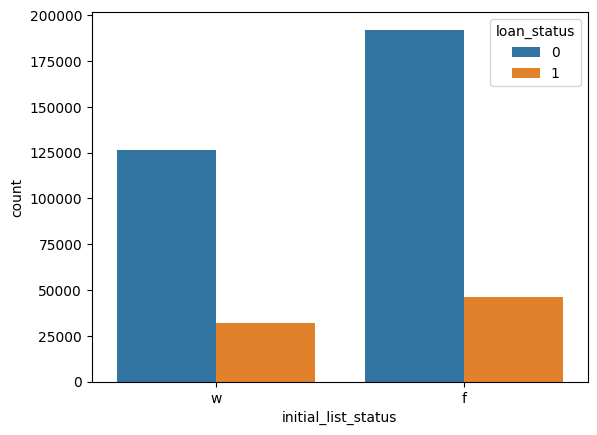

In [465]:
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

In [466]:
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

#### Application Type

In [467]:
print(df['application_type'].isna().sum())
df['application_type'].value_counts()


0


application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [468]:
df = pd.get_dummies(data=df,columns=['application_type'],drop_first=True,dtype=int)

#### Emp_title ( dropping columns)

In [469]:
df.drop(['emp_title','issue_d','earliest_cr_line','sub_grade','emp_length','title'],axis=1,inplace=True)

#### Mort_Account

In [470]:
total_Account_avg = df.groupby('total_acc')['mort_acc'].mean()

In [471]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_Account_avg[total_acc].round()
    else:
        return mort_acc

In [472]:
df['mort_acc'] = df.apply(lambda x :fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [473]:
df['mort_acc'].isna().sum()

0

loan_status         0         1
mort_acc                       
0.0          0.351109  0.440106
1.0          0.188732  0.182949
2.0          0.162456  0.142034
3.0          0.116834  0.096016
4.0          0.073578  0.059726
5.0          0.048446  0.036923
6.0          0.029530  0.022234
7.0          0.016284  0.011589
8.0          0.008460  0.005723
9.0          0.004571  0.002700
p_value is 0.0


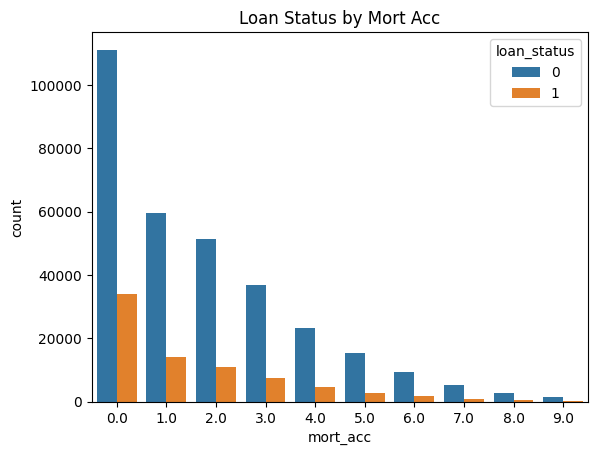

In [474]:
mort_acc = df[df['mort_acc'] < 10]
print(pd.crosstab(mort_acc['mort_acc'],mort_acc['loan_status'],normalize='columns'))
print("p_value is", chi2_contingency(pd.crosstab(mort_acc['mort_acc'],mort_acc['loan_status']))[1])

sns.countplot(x='mort_acc',data=mort_acc,hue='loan_status')
plt.title('Loan Status by Mort Acc')
plt.show()


#### Checking the corrrealtion

<Axes: >

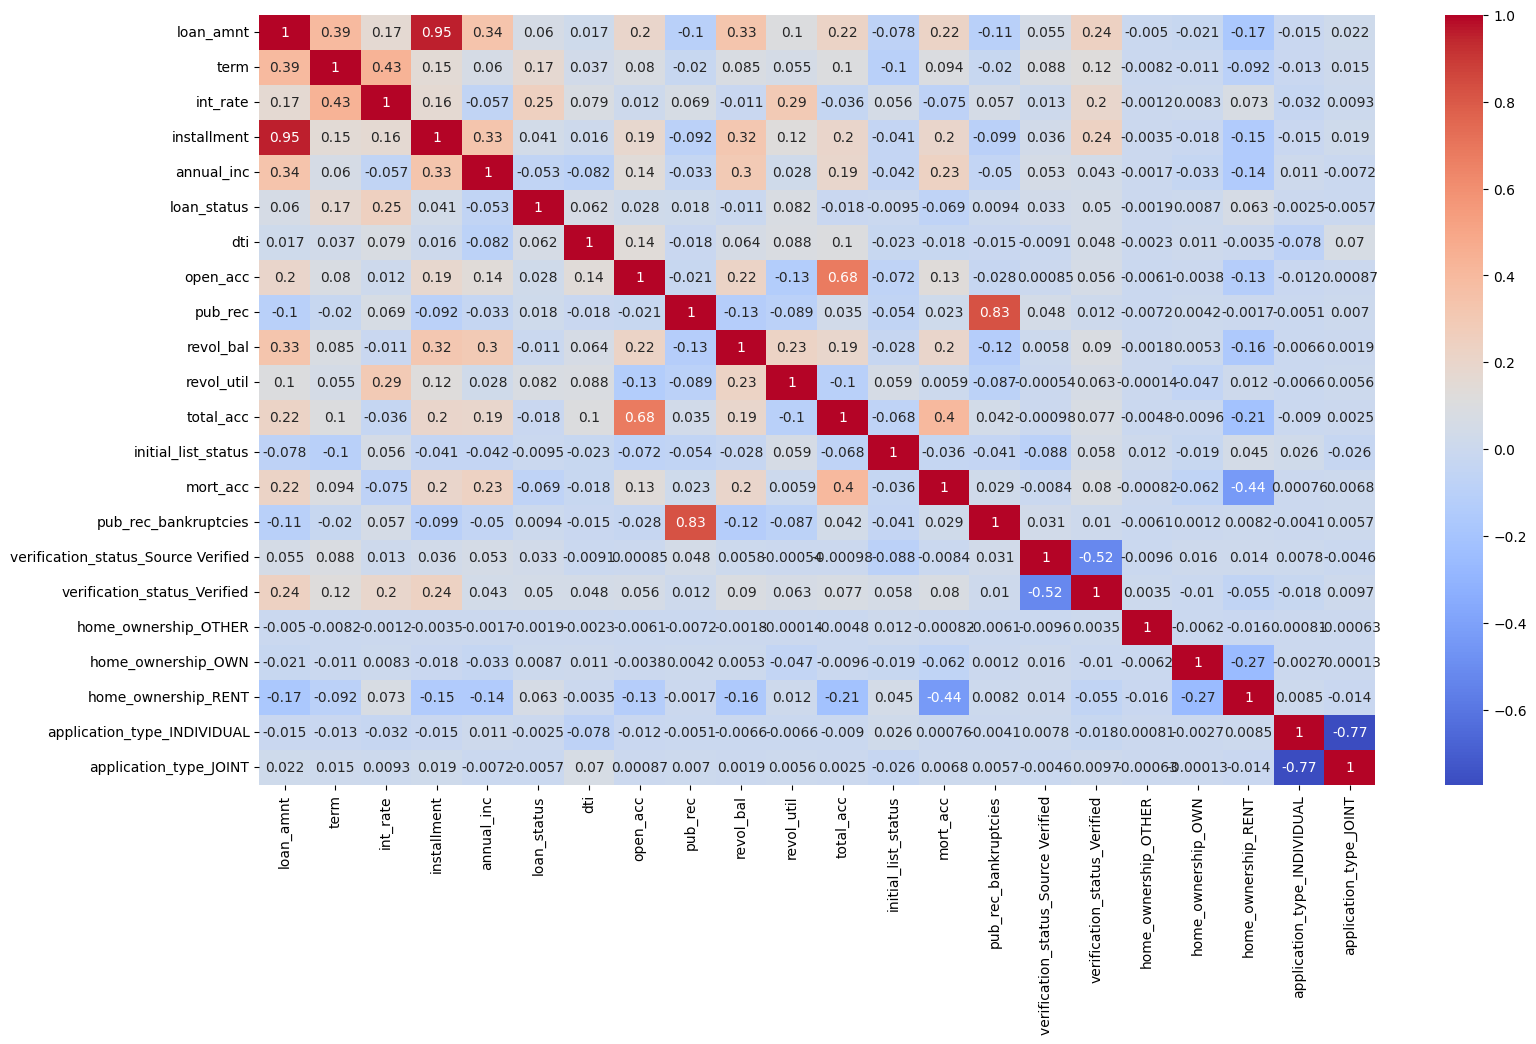

In [475]:
plt.figure(figsize=(18,10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm',annot=True)

We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

- installment: The monthly payment owed by the borrower if the loan originates.
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

So, we can drop either one of those columns.

In [476]:
# dropping the insallment columns
df.drop(['installment','pub_rec'],axis=1,inplace=True)


#### Public Record Bankruptices

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

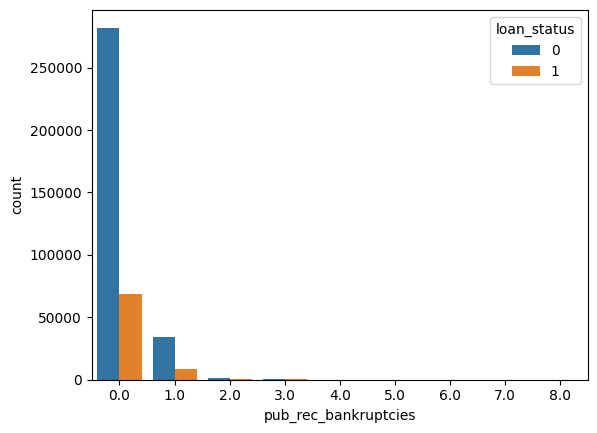

In [477]:
sns.countplot(data=df, x='pub_rec_bankruptcies', hue='loan_status')

In [478]:
print("Null values =",df['pub_rec_bankruptcies'].isnull().sum())
df['pub_rec_bankruptcies'].value_counts()

Null values = 535


pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [479]:
for i in [0,1]:
    df.loc[df['loan_status'] == i,'pub_rec_bankruptcies'] = df.loc[df['loan_status'] == i,'pub_rec_bankruptcies'].fillna(i)
df['pub_rec_bankruptcies'].isnull().sum()

0

In [480]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 0 else 0)

#### Address

In [481]:
df['Pin_Code'] = df['address'].apply(lambda x: x.split()[-1])
df.drop('address',axis=1,inplace=True)

In [482]:
df = pd.get_dummies(data=df,columns= ['Pin_Code'], drop_first=True,dtype=int)

#### Final Preprocessing

In [483]:
df.dropna(inplace=True)

In [484]:
df = pd.get_dummies(data=df,columns=['grade','purpose'],drop_first=True,dtype=int)

In [485]:
df

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,verification_status_Source Verified,verification_status_Verified,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_INDIVIDUAL,application_type_JOINT,Pin_Code_05113,Pin_Code_11650,Pin_Code_22690,Pin_Code_29597,Pin_Code_30723,Pin_Code_48052,Pin_Code_70466,Pin_Code_86630,Pin_Code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,117000.0,0,26.24,16.0,36369.0,41.8,25.0,0,0.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,65000.0,0,22.05,17.0,20131.0,53.3,27.0,1,3.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,43057.0,0,12.79,13.0,11987.0,92.2,26.0,1,0.0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,54000.0,0,2.60,6.0,5472.0,21.5,13.0,1,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,55000.0,1,33.95,13.0,24584.0,69.8,43.0,1,1.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,40000.0,0,15.63,6.0,1990.0,34.3,23.0,0,0.0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,110000.0,0,21.45,6.0,43263.0,95.7,8.0,1,1.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,56500.0,0,17.56,15.0,32704.0,66.9,23.0,1,0.0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,64000.0,0,15.88,9.0,15704.0,53.8,20.0,1,5.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Outlier Detection & Treatment -

In [486]:
numerical_data = df_2.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

12

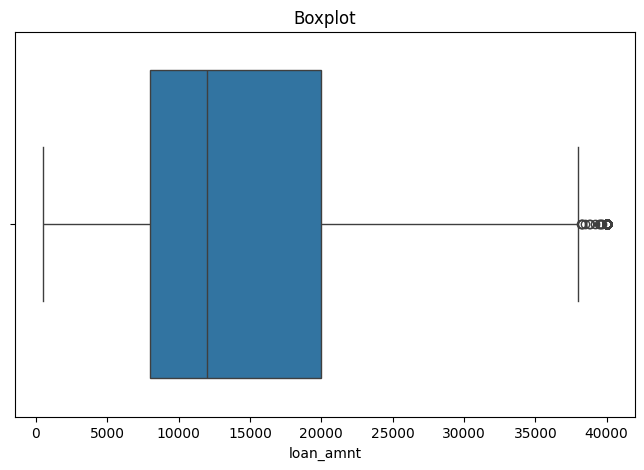

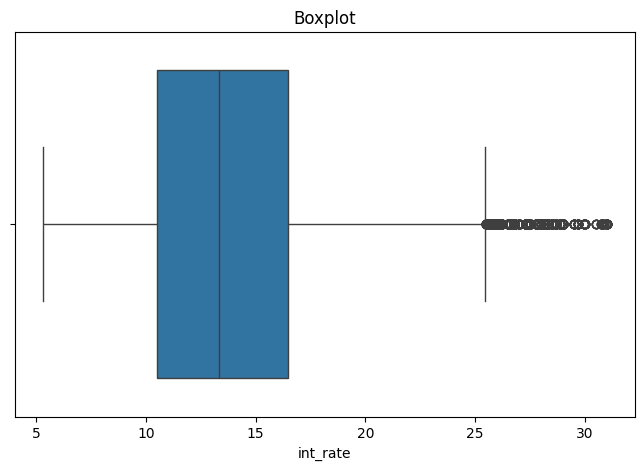

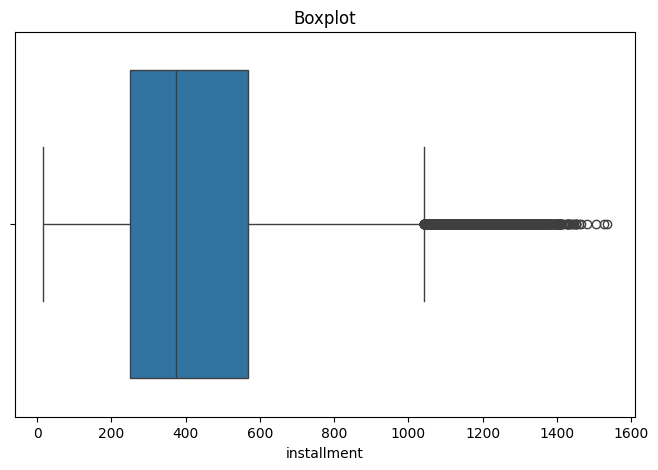

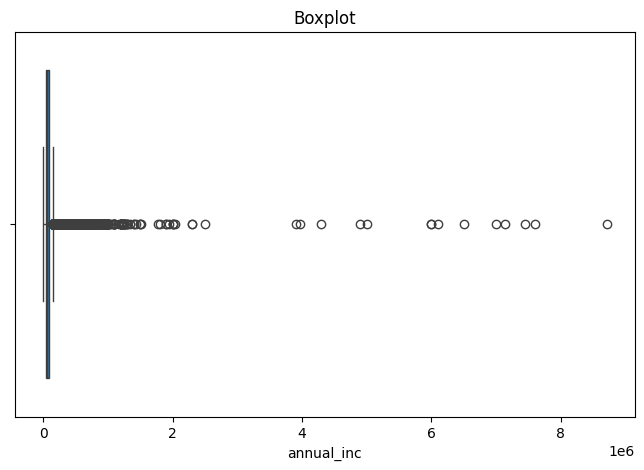

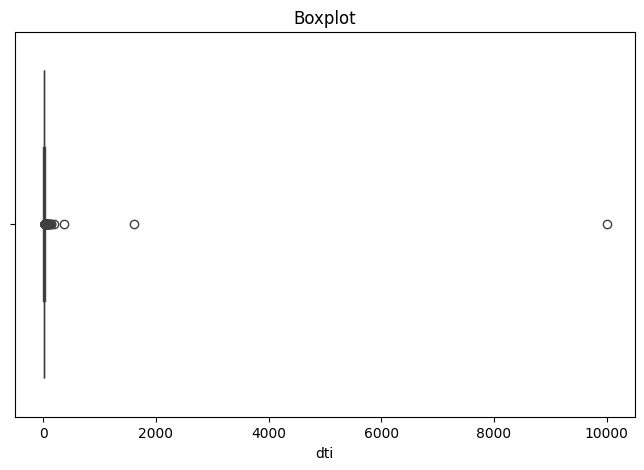

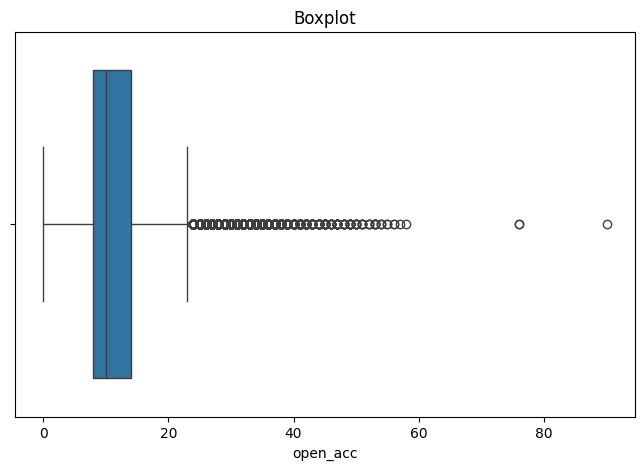

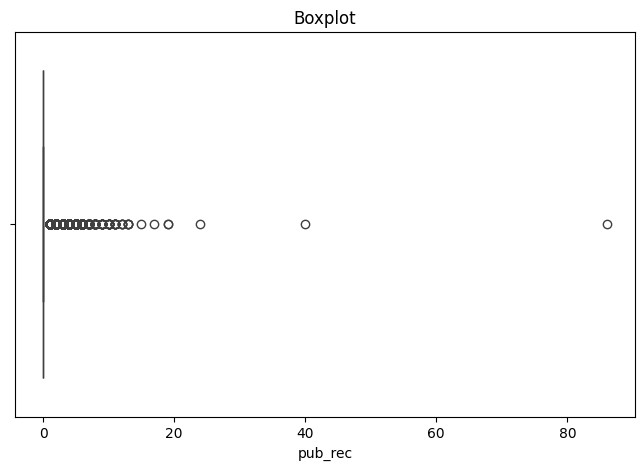

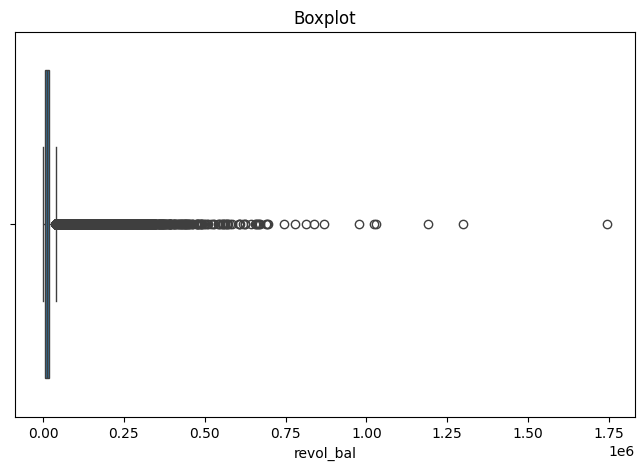

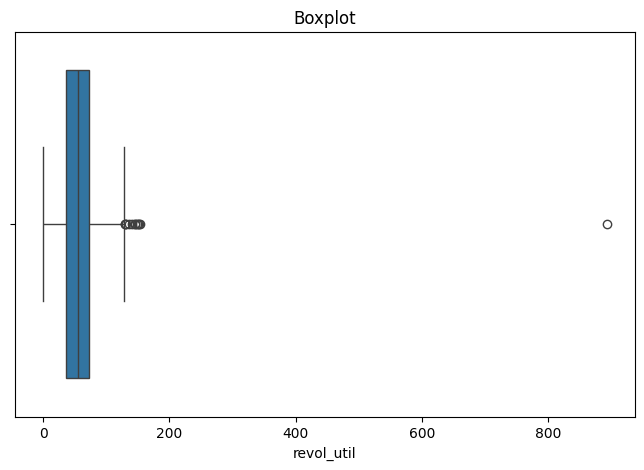

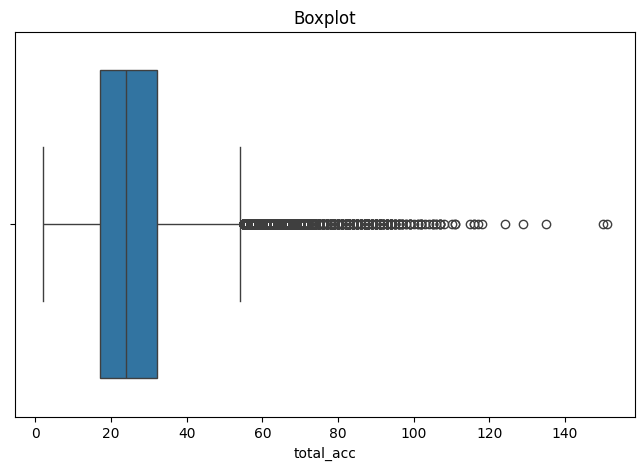

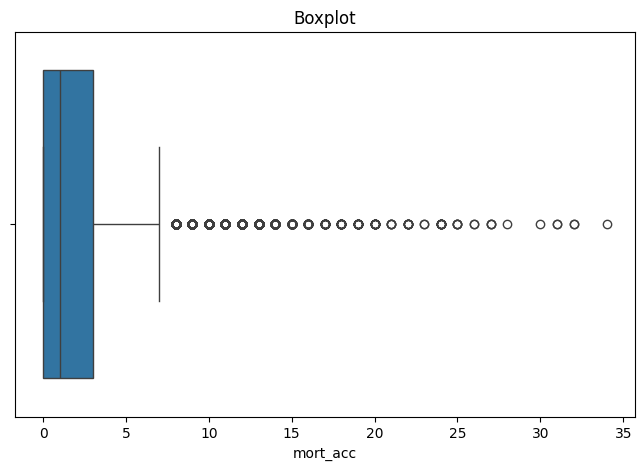

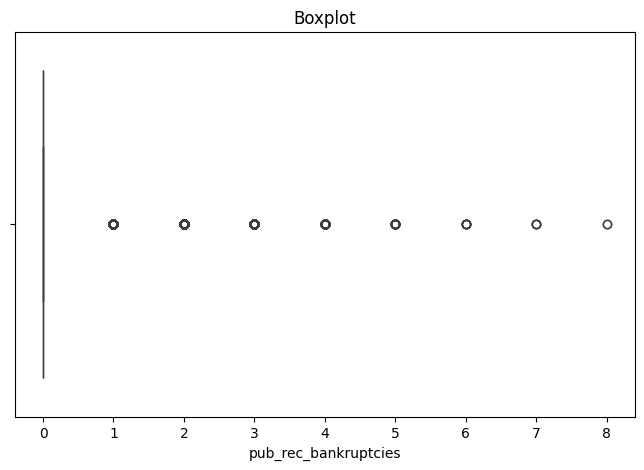

In [487]:
def box_plot(col):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_2[col])
    plt.title('Boxplot')
    plt.show()

for col in num_cols:
    box_plot(col)

### Data Preparation

In [523]:
x = df.drop('loan_status',axis=1)
y = df['loan_status']

In [524]:
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
x_train,x_cv,y_train,y_cv = train_test_split(x_tr,y_tr,test_size=0.2,random_state=42,shuffle=True)

#### MinMaxScaler -

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

In [525]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_cv = pd.DataFrame(scaler.transform(x_cv), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)

### Logistic Regression


In [526]:
c = [0.001,0.01,0.1,1]
for rate in c:
    model = LogisticRegression(C = rate,max_iter=1000,n_jobs=-1)
    model.fit(x_train,y_train)
    print(f"train_Score is", model.score(x_train,y_train))
    print(f"validation_Score is",model.score(x_cv,y_cv))

train_Score is 0.883477704692793
validation_Score is 0.8856619446944931
train_Score is 0.8874377176427856
validation_Score is 0.8898785552976106
train_Score is 0.8876074888859058
validation_Score is 0.8900838584355901
train_Score is 0.8878325344872514
validation_Score is 0.8901312360828161


In [527]:
log_reg = LogisticRegression(max_iter= 1000)
log_reg.fit(x_train,y_train)
print(f"train_Score is", model.score(x_train,y_train))
print(f"validation_Score is",model.score(x_cv,y_cv))
print(f"Test_Score is",model.score(x_test,y_test))

train_Score is 0.8878325344872514
validation_Score is 0.8901312360828161
Test_Score is 0.8893886369091989


#### Confusion Matrix -

In [528]:
confusion_matri = confusion_matrix(y_test, log_reg.predict(x_test))
print(confusion_matri)

[[63522   195]
 [ 8560  6874]]


#### Classification Report -

In [529]:
print(classification_report(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     63717
           1       0.97      0.45      0.61     15434

    accuracy                           0.89     79151
   macro avg       0.93      0.72      0.77     79151
weighted avg       0.90      0.89      0.87     79151



* Precision score and recall score for full paid status is almost same indicates that model is doing decent job which correctly classified the both of the scenarios
* Precision score for charged off status is more than recall score which is perfect

#### ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

- TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

- FPR=(FP)/(FP+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

#### AUC (Area under the ROC Curve) -

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

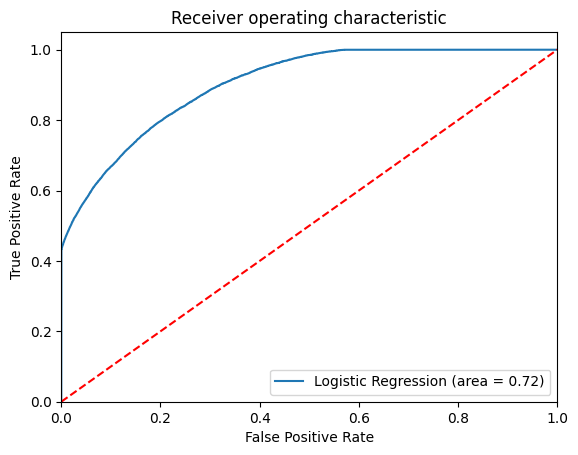

In [530]:
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

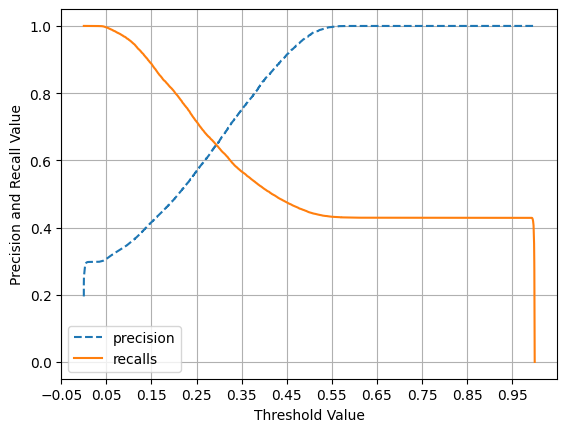

In [531]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, log_reg.predict_proba(x_test)[:,1])

### Multicollinearity check using Variance Inflation Factor (VIF) -

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF.
In VIF method, we pick each independent feature and regress it against all of the other independent features.
VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF = 1/1-R2

In [532]:
drop_list =[]
scores = []
while True:
    vif = [variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
    features = x_train.columns.tolist()
    max_index = np.argmax(vif)
    column_name = features[max_index]
    if vif[max_index] <= 10 or log_reg.score(x_train,y_train) < 0.85:
        break
    else:
        drop_list.append(column_name)
        scores.append(log_reg.score(x_train,y_train))
        x_train.drop(columns=[column_name],inplace=True)
        log_reg.fit(x_train,y_train)


In [533]:
drop_list

['application_type_INDIVIDUAL',
 'int_rate',
 'purpose_debt_consolidation',
 'total_acc']

In [534]:
scores

[0.8878325344872514,
 0.8878088454765835,
 0.8877456747814689,
 0.8877772601290261]

### Oversampling using SMOTE

In [535]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

C:\Users\ahuja\AppData\Local\Temp\ipykernel_16204\3805739986.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())


In [536]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (406818, 43)
After OverSampling, the shape of train_y: (406818,) 

After OverSampling, counts of label '1': 203409
After OverSampling, counts of label '0': 203409


In [538]:
x_test.drop(columns=drop_list,inplace=True)

In [539]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(x_test)

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     63717
           1       0.48      0.81      0.60     15434

    accuracy                           0.79     79151
   macro avg       0.71      0.80      0.73     79151
weighted avg       0.85      0.79      0.81     79151



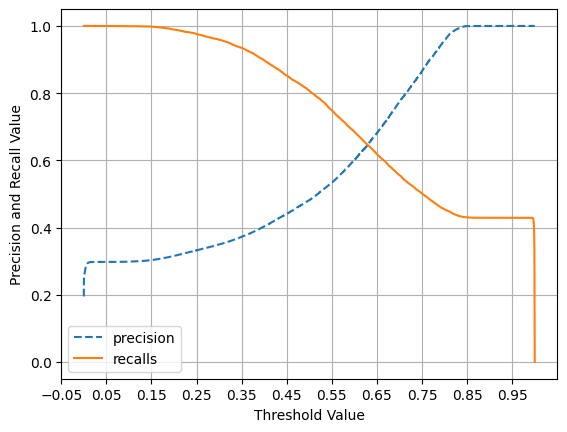

In [540]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr1.predict_proba(x_test)[:,1])

Tradeoff Questions
1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on
an opportunity to finance more individuals and earn interest on it.
Answer - Since data is imbalances by making the data balance we can try to avoid false positives. For evaluation metrics, we should
be focusing on the macro average f1-score because we don't want to make false positive prediction and at the same we want to detect
the defualers.
2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone
Answer - Below are the most features and their importance while making the prediction. So these variables can help the managers to
identify which are customers who are more likely to pay the loan amount fully,

Actional Insights and Recommendations
1. 80% of the customers have paid the loan fully.
2. 20% of the customers are the defaulters.
3. The organization can the trained model to make prediction for whether a person will likely to pay the loan amount or he will be a defaulter.
4. Model achieves the 94% f1-score for the negative class (Fully Paid).
5. Model achieves the 62% f1-score for the positive class (Charged off).
6. Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job. We can trust this model for
unseen data
7. By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.
8. ROC AUC curve area of 0.73, the model is correctly classifying about 73% of the instances. This is a good performance, but there is still
room for improvement.
9. The precision-recall curve allows us to see how the precision and recall trade-off as we vary the threshold. A higher threshold will result in
higher precision, but lower recall, and vice versa. The ideal point on the curve is the one that best meets the needs of the specific
application.
10. After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.
11. Accuracy of Logistic Regression Classifier on test set: 0.891 which is decent and not by chance.